## LONDON BIKE SHARING DATASET FROM KAGGLE

The aim is to understand data, make it well suitable to create visualizations and create visualisation to uncover stories behind this data.Note that this will differ from the process of modifying the data to create preidctive models of do further analysis.<br>
##### There are 2 steps-<br>
1. Make the data ready to visualize- PYTHON
2. Plan Visualization- TABLEAU

### <font color = 'blue'>MAKE DATA READY TO VISUALIZE</font>

#### Metadata:<br>
<font color = 'blue'>"timestamp"</font> - timestamp field for grouping the data<br>
<font color = 'blue'>"cnt"</font>       - the count of a new bike shares<br>
<font color = 'blue'>"t1" </font>       - real temperature in C<br>
<font color = 'blue'>"t2"</font>        - temperature in C "feels like"<br>
<font color = 'blue'>"hum"</font>       - humidity in percentage<br>
<font color = 'blue'>"wind_speed"</font>   - wind speed in km/h<br>
<font color = 'blue'>"weather_code" </font>- category of the weather<br>
<font color = 'blue'>"is_holiday"</font> - boolean field - 1 holiday / 0 non holiday<br>
<font color = 'blue'>"is_weekend"</font> - boolean field - 1 if the day is weekend<br>
<font color = 'blue'>"season"</font> - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br>

##### "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [3]:
import pandas as pd

In [5]:
bikes = pd.read_csv("...../london_merged.csv")

In [6]:
bikes.info() # explore data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
bikes.shape # lets check dimensions of the dataframe

(17414, 10)

In [9]:
bikes.head(5) # lets see how the dataset looks like

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
bikes.weather_code.value_counts() # lets check unique values in weather code
# bikes.weather_code.value_counts().sum() # check if the sum is equal to the total rows

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [14]:
bikes.season.value_counts()
# bikes.season.value_counts().sum()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [15]:
# lets rename the columns for better clarity
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count' ,
    't1':'temp_Real_C' ,
    't2':'temp_feels_like_C' ,
    'hum':'humidity_percent' ,
    'wind_speed':'wind_speed_kph' ,
    'weather_code':'weather' ,
    'is_holiday':'is_holiday' ,
    'is_weekend':'is_weekend' ,
    'season':'season'
}

bikes.rename(new_cols_dict, axis = 1, inplace = True)
# inplace = True: operation to be performed directly on the original DataFrame, modifying it in place (no new DataFrame created)

In [17]:
# creating season dictionary so that we can map the integer 0-3 to the actual written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'fall',
    '3.0':'winter'
}

# creating weather dictionary so that we can map the integer 0-3 to the actual written values
weather_dict = {
    '1.0':'mostly_clear',
    '2.0':'scattered_cloud',
    '3.0':'broken_cloud',
    '4.0':'cloudy',
    '7.0':'rain',
    '10.0':'rain_with_thunderstorm',
    '26.0':'snowfall'
}

# change the column name datatypes
bikes.season = bikes.season.astype('str')
bikes.weather = bikes.weather.astype('str')

# change column names by mapping the dictonary values
bikes.season = bikes.season.map(season_dict)
bikes.weather = bikes.weather.map(weather_dict)

In [18]:
bikes.head() # lets check if the changes we made are established

,time,count,temp_Real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,broken_cloud,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,mostly_clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,mostly_clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,mostly_clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,mostly_clear,0.0,1.0,winter


In [21]:
# now we can see that the datatype of is_holiday and is_weekned are float
bikes['is_holiday'].info()
bikes['is_weekend'].info()

# these are not numbers, but categories, thus we need to change the data type to category
# note: this step is not necessary as we will be doing visualization directly without any calculations on these fields
# thus not performing this step

<class 'pandas.core.series.Series'>
RangeIndex: 17414 entries, 0 to 17413
Series name: is_holiday
Non-Null Count  Dtype  
--------------  -----  
17414 non-null  float64
dtypes: float64(1)
memory usage: 136.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 17414 entries, 0 to 17413
Series name: is_weekend
Non-Null Count  Dtype  
--------------  -----  
17414 non-null  float64
dtypes: float64(1)
memory usage: 136.2 KB


In [23]:
# lets write the file into an excel
bikes.to_excel('...../london_bikes_final.xlsx', sheet_name = 'Data')

    PLAN VISUALIZATION- TABLEAU

1. Find total bikes
2. Find the moving average: will be the main visual which will control other visualizations as well
3. Temperature vs Wind Speed heat map
4. Create statistical information on different segemnts
5. Have user defined parameters to control the main visual

We will connect the final data saved as an excel file to the tableau dashboard. We need to check if the data loaded has the correct/ required data types. The time field was read as a <font color = 'blue'>text</font> data type, whereas it is <font color = 'blue'>date time</font> format.<br>
NOTE: the calculations and parameters should be planned beforehand to make visualizations<br>


### <font color = 'blue'>TABLEAU DASHBOARD IMAGE</font>

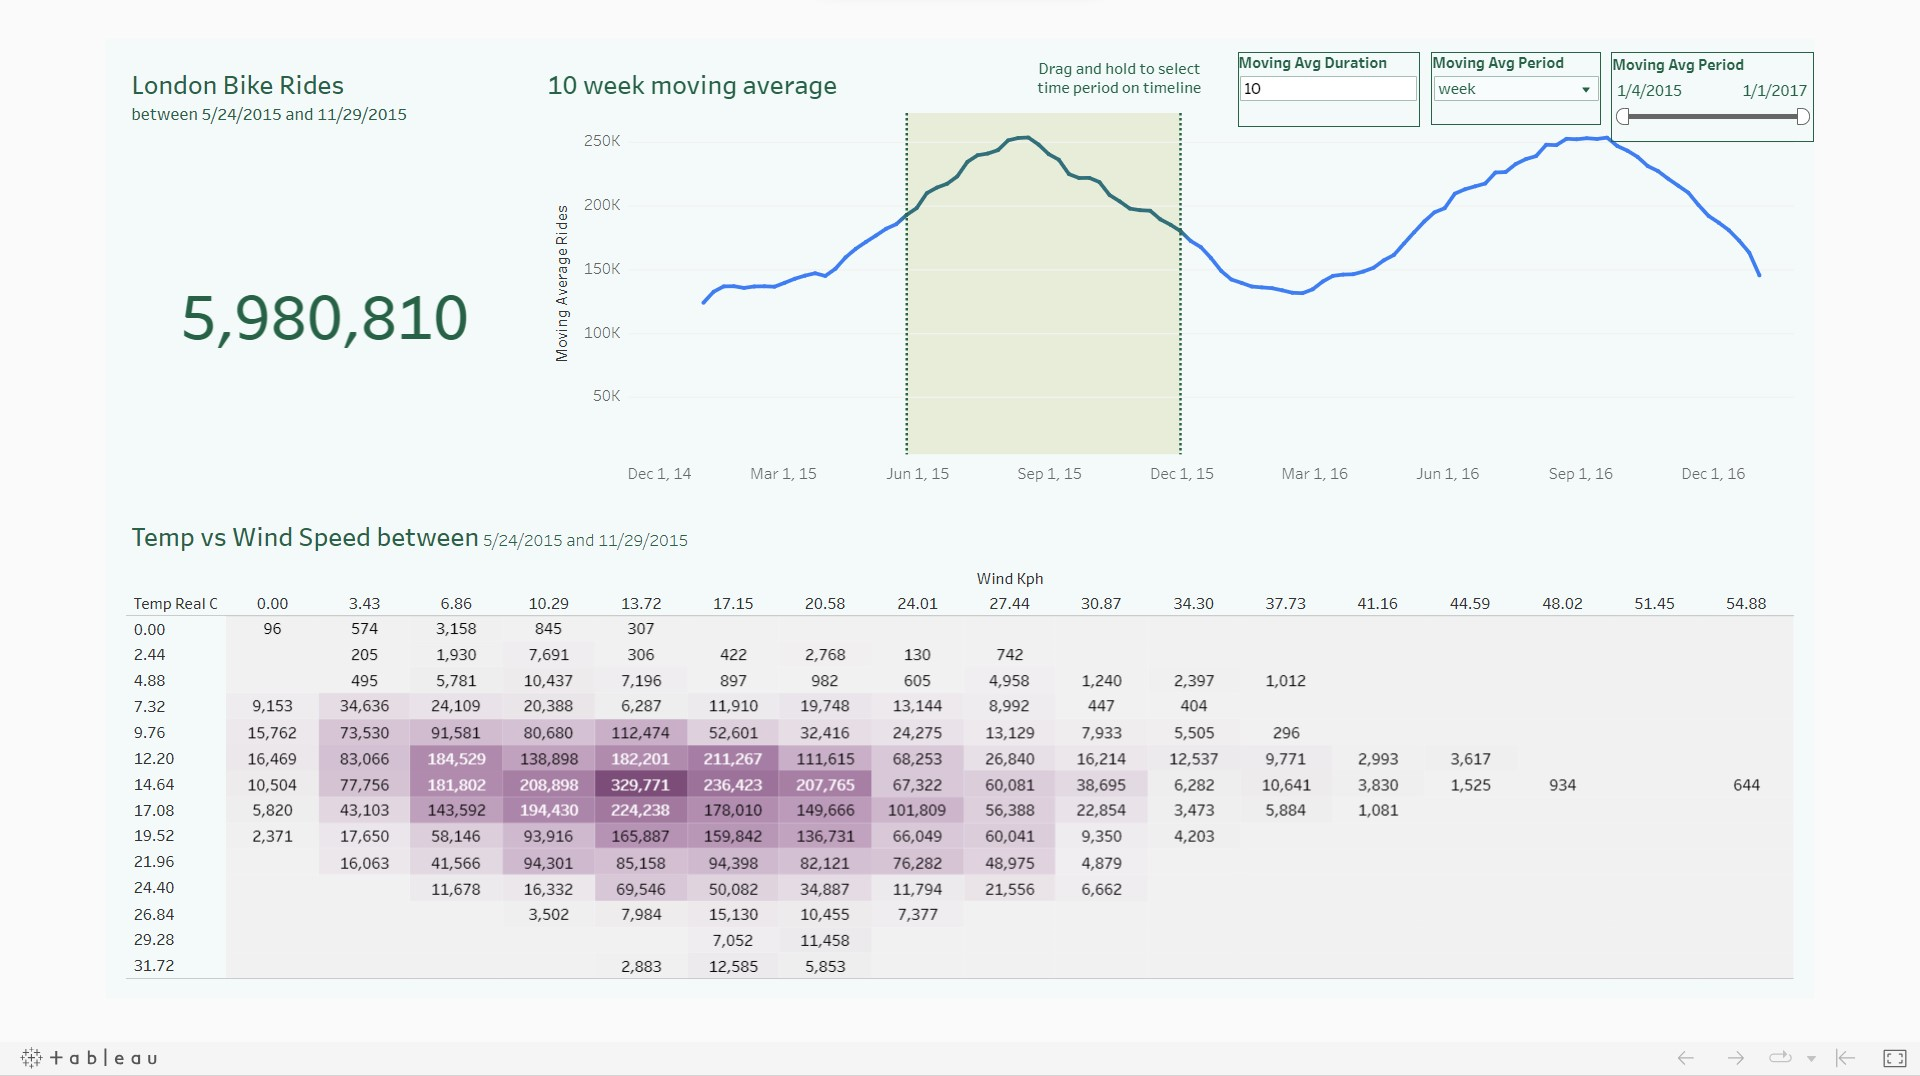

The image above is a screenshot of the visualization. Follow the link below for the dynamic dashboard-
https://public.tableau.com/app/profile/rupam.priya/viz/LondonBikeSharing_16926477514660/Dashboard1